# Data Wrangling task2 assignment

**IMPORT NECESSARY LIBRARIES**

In [12]:
import os
import json
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt

#### Load the country.json file

In [2]:
with open('COUNTRY.json') as f:
    raw_data = f.read()
    data = json.loads(raw_data)

#### Create a more readable json and name it group_data

In [13]:
countries = data['dimension'][0]['code']
group_data=[]
for item in countries:
    x = {
        "name": item['display'],
        "WHO_REGION": None,
        "WHO_REGION_CODE": None,
        "WORLD_BANK_INCOME_GROUP": None,
        "WORLD_BANK_INCOME_GROUP_CODE": None
    }
    attr = item['attr']
    for i in attr:
        if i['category'] == 'WHO_REGION':
            x['WHO_REGION'] = i['value']
        if i['category'] == 'WHO_REGION_CODE':
            x['WHO_REGION_CODE'] = i['value']
        if i['category'] == 'WORLD_BANK_INCOME_GROUP':
            x['WORLD_BANK_INCOME_GROUP'] = i['value']
        if i['category'] == 'WORLD_BANK_INCOME_GROUP_CODE':
            x['WORLD_BANK_INCOME_GROUP_CODE'] = i['value']
    group_data.append(x)
    

#### Create the relevant grouped data and name  them who_region_groups and world_bank_income_group

In [ ]:
who_region_groups = {}
world_bank_income_group = {}
for item in group_data:
    if item['WHO_REGION_CODE'] not in who_region_groups:
        who_region_groups[item['WHO_REGION_CODE']] = []
    who_region_groups[item['WHO_REGION_CODE']].append(item)
    
    if item['WHO_REGION_CODE'] not in world_bank_income_group:
        world_bank_income_group[item['WHO_REGION_CODE']] = []
    world_bank_income_group[item['WHO_REGION_CODE']].append(item)

### open read and name the population data file contents as fileDara

In [4]:
fileData = open('WHOSIS_MDG_000003.csv').readlines()[1:]

#### Create a vallidataor for range field in the fileData

In [5]:
def validateRange(range_data):
    return range_data.strip().replace("[", '').replace("]", '')

#### Format the data and name it formatedData

In [6]:
formatedData = []
for line in fileData:
    items = line.strip().split(',')
    country = items[0]
    year = items[1]
    infant = items[2]
    infantMortalityRate = infant.split(' ')[0]
    infantMortalityConfidence = infant.split(' ')[1]
    neonatal = items[3]
    neonatalMortalityRate = neonatal.split(' ')[0]
    neonatalMortalityConfidence = neonatal.split(' ')[1]
    underMortalityFive = items[4]
    underMortalityFiveRate = underMortalityFive.split(' ')[0]
    underMortalityFiveConfidence = underMortalityFive.split(' ')[1]
    lineMortalityData = [
        country, int(year), float(infantMortalityRate), validateRange(infantMortalityConfidence),
        float(neonatalMortalityRate), validateRange(neonatalMortalityConfidence), 
        float(underMortalityFiveRate), validateRange(underMortalityFiveConfidence)
    ]
    formatedData.append(lineMortalityData)

### Create a reusable function data to draw the graphs

In [16]:
def plot_bar(data, title):
    # Get The under 5 mortality rate as a list
    y_axis = [i[6] for i in data]
    # Get The Country names as Labels
    x_labels = [i[0] for i in data]
    index = np.arange(len(x_labels))
    plt.bar(index, y_axis, width=0.8)
    plt.xlabel('Country', fontsize=15)
    plt.ylabel('Mortality', fontsize=15)
    plt.xticks(index, x_labels, fontsize=15, rotation=40)
    plt.title(title, fontsize=20)
    plt.show()

#### Create a list to hold mortality data in the year 2015

In [8]:
underFive2015 = []
for key in formatedData:
    if key[1] == 2015:
        underFive2015.append(key)

### Create the data for WHO_REGION group, categorize them and draw the graph of the first 2 categories

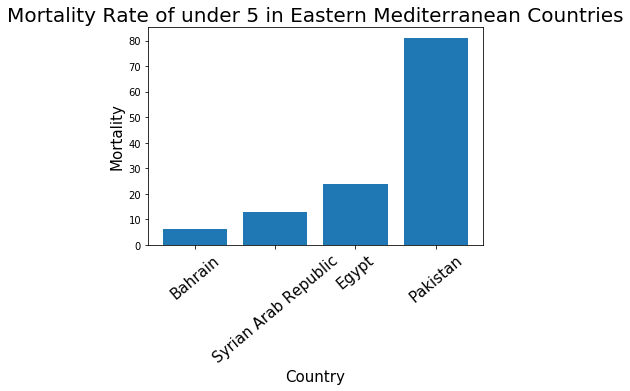

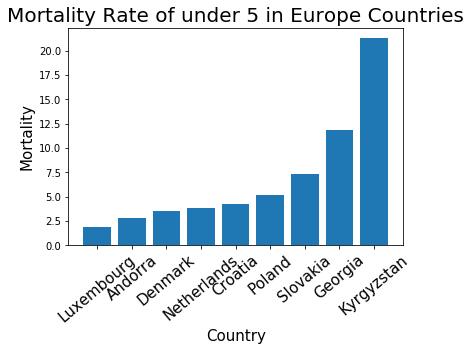

In [19]:
count = 0
for key in who_region_groups.keys():
    if count >=2: break
    count += 1
    countries_mortality = []
    for country in who_region_groups[key]:
        for item in underFive2015:
            if item[0] == country['name']:
                countries_mortality.append(item)
    graph_data = sorted(countries_mortality, key=itemgetter(6))
    if who_region_groups[key][0]['WHO_REGION'] is None or len(graph_data) < 20:
        continue
    title = 'Mortality Rate of under 5 in ' + str(who_region_groups[key][0]['WHO_REGION']) \
            + " Countries"
    plot_bar(graph_data[::6], title )

### Create the data for world bank income group, categorize them and draw the graph of the first 2 categories

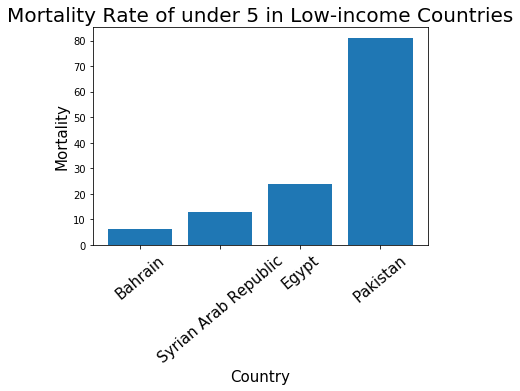

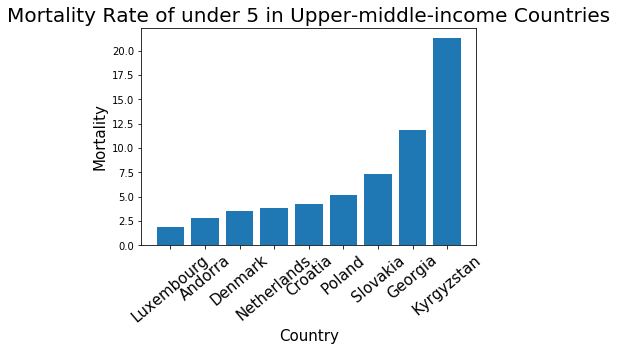

In [18]:
count = 0
for key in world_bank_income_group.keys():
    if count >=2: break
    count += 1
    countries_mortality = []
    for country in world_bank_income_group[key]:
        for item in underFive2015:
            if item[0] == country['name']:
                countries_mortality.append(item)
    graph_data = sorted(countries_mortality, key=itemgetter(6))
    if world_bank_income_group[key][0]['WORLD_BANK_INCOME_GROUP'] is None or len(graph_data) < 20:
        continue
    title = 'Mortality Rate of under 5 in ' + str(world_bank_income_group[key][0]['WORLD_BANK_INCOME_GROUP']) \
            + " Countries"
    plot_bar(graph_data[::6], title )